# Preprocessing the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.arraysetops import setxor1d
from scipy.integrate import odeint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Math 142 Project/Datasets1/allData.csv', index_col='DateSpecCollect', parse_dates=True)

In [ ]:
df_deaths = pd.read_csv('/content/drive/MyDrive/Math 142 Project/Datasets1/covid_deaths.csv')

In [ ]:
df_deaths.loc[]

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-05-04,2023-05-05,2023-05-06,2023-05-07,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-13
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,139,139,139,139,139,139,139,139,139,139
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51


In [ ]:
def cumulative_list(name, reference, table):
  size = table.shape[0]
  columns = list(table.columns)
  col_ind = columns.index(reference)
  arr = []
  for i in range(size):
    toAdd = table.iloc[0:i+1, col_ind].sum() + 0.0
    arr.append(toAdd)
  table[name] = arr
  return table

In [ ]:
df_temp = df.sort_values(by='DateSpecCollect')
df_temp.drop(columns=['Total.1', '528641'], axis=1, inplace=True)
df_temp.rename(columns={'Total': 'Infected per day'}, inplace=True)
df_temp['7-day Avg'] = df_temp['Infected per day'].rolling(window=7).mean()
df_temp['28-day Avg'] = df_temp['Infected per day'].rolling(window=28).mean()
cumulative_list("Total Infected for 7-day Avg", "7-day Avg", df_temp)
cumulative_list("Total Infected for 28-day Avg", "28-day Avg", df_temp)
cumulative_list("Total Infected", "Infected per day", df_temp)
df_new = df_temp.loc['2020-03-15':'2022-02-08', :].copy()
df_new

,Infected per day,7-day Avg,28-day Avg,Total Infected for 7-day Avg,Total Infected for 28-day Avg,Total Infected
DateSpecCollect,,,,,,
2020-03-15,11,9.714286,NaN,37.571429,0.000000,87.0
2020-03-16,34,14.428571,NaN,52.000000,0.000000,121.0
2020-03-17,42,20.142857,NaN,72.142857,0.000000,163.0
2020-03-18,32,24.000000,NaN,96.142857,0.000000,195.0
2020-03-19,51,29.714286,NaN,125.857143,0.000000,246.0
...,...,...,...,...,...,...
2022-02-04,735,1082.714286,3611.821429,524883.142857,495213.321429,528042.0
2022-02-05,251,967.428571,3456.571429,525850.571429,498669.892857,528293.0
2022-02-06,163,899.714286,3333.214286,526750.285714,502003.107143,528456.0


In [ ]:
df_new.to_csv('/content/drive/MyDrive/Math 142 Project/Datasets1/allData1.csv')

In [ ]:
df_wave1 = df_new.loc['2020-04-01':'2020-09-30', :].copy()
df_wave2 = df_new.loc['2020-10-01': '2021-03-31', :].copy()
df_wave3 = df_new.loc['2021-07-01': '2021-10-31', :].copy()

df_wave1.to_csv('/content/drive/MyDrive/Math 142 Project/Datasets1/wave1Averaged_Nameer.csv')
df_wave2.to_csv('/content/drive/MyDrive/Math 142 Project/Datasets1/wave2Averaged_Nameer.csv')
df_wave3.to_csv('/content/drive/MyDrive/Math 142 Project/Datasets1/wave3Averaged_Nameer.csv')

# Plotting the Data

In [ ]:
def odes(x, t, a_param, k_param):
  #constants
  # a = 1/infection_rate
  # k = 1/infectious_period
  a = a_param
  k = k_param

  #assign each ODE to a vector element
  S = x[0]
  I = x[1]
  R = x[2]

  #define each ODE
  dSdt = -a*S*I
  dIdt = a*S*I - k*I
  dRdt = k*I

  return [dSdt, dIdt, dRdt]

In [ ]:
test_a = 1/2.5
test_k = 1/3

print(test_a/test_k)

1.2000000000000002


Max Infected peak:  0.15338844340247956
a =  0.205
k =  0.1025
R0 =  2.0


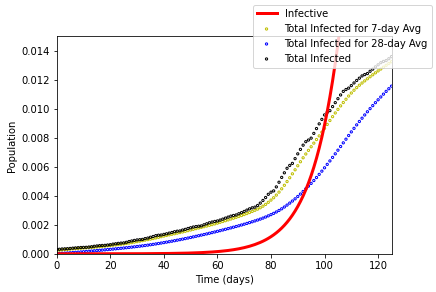

In [ ]:
from uuid import NAMESPACE_OID

#initial conditions
N = 3186989
I0 = 1/N
S0 = 1. - I0
R0 = 0.
x0 = [S0, I0, R0]

def wave1(a, k):
  #declare a time vector (time window)
  size1 = df_wave1.shape[0]
  t = np.linspace(0, size1-1, size1)
  #x = odeint(odes,x0,t, args=((1/2.5)+(0.01/2), (1/3)-0.01))

  #Experimental
  x = odeint(odes,x0,t, args=(a, k))

  S = x[:,0]
  I = x[:,1]
  R = x[:,2]

  y1_a = df_wave1['Total Infected for 7-day Avg'].to_numpy().copy()
  y1_a /= N
  y1_b = df_wave1['Total Infected for 28-day Avg'].to_numpy().copy()
  y1_b /= N
  y1_c = df_wave1['Total Infected'].to_numpy().copy()
  y1_c.astype(float)
  y1_c /= N
  y1 = np.array([y1_a, y1_b, y1_c])

  print("Max Infected peak: ", max(I))
  fig1 = plt.figure(1); fig1.clf()
  #plt.plot(t, S, 'g', lw=3, label='Suseptible')
  plt.plot(t, I, 'r', lw=3, label='Infective')
  #plt.plot(t, R, 'b', lw=3, label='Removed')
  # plt.plot(t, y1[0], 'y', lw=3, label='Total Infected for 7-day Avg')
  # plt.plot(t, y1[1], 'b', lw=3, label='Total Infected for 28-day Avg')
  # plt.plot(t, y2[2], 'black', lw=3, label='Total Infected')
  plt.scatter(t, y1[0], s=5, facecolors='none', edgecolors='y', label='Total Infected for 7-day Avg')
  plt.scatter(t, y1[1], s=5, facecolors='none', edgecolors='b', label='Total Infected for 28-day Avg')
  plt.scatter(t, y1[2], s=5, facecolors='none', edgecolors='black', label='Total Infected')
  plt.axis([0, 125, 0, 0.015])

  fig1.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Population')

  return S, I, R

# const = 0.41
# a = 0.5 * const
# k = (1/4) * const

const = 0.41
a = 0.5 * const
k = (1/4) * const
S, I, R = wave1(a, k)
R0 = a/k
print("a = ", a)
print("k = ", k)
print("R0 = ", R0)
# print("S(120) = ", S[120])
# print("I(120) = ", I[120])

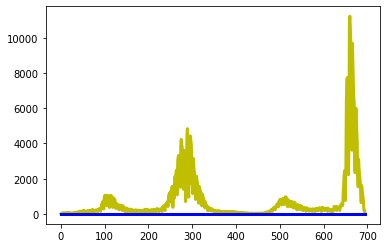

In [ ]:
size = df_new.shape[0]
t = np.linspace(0, size-1, size)
something = df_new['Infected per day'].to_numpy().copy()
something.astype(float)
something / N
a = 1/8
k = 1/7
x = odeint(odes,x0,t, args=(a, k))

S = x[:,0]
I = x[:,1]
R = x[:,2]

plt.plot(t, something, 'y', lw=3, label='Daily new cases')
plt.plot(t, S, 'g', lw=3, label='Suseptible')
plt.plot(t, I, 'r', lw=3, label='Infective')
plt.plot(t, R, 'b', lw=3, label='Removed')

In [ ]:
something.astype(float)
something / N

array([3.45153372e-06, 1.06683770e-05, 1.31785833e-05, 1.00408254e-05,
       1.60025654e-05, 1.69438928e-05, 7.21684323e-06, 8.15817061e-06,
       1.91403234e-05, 2.29056329e-05, 1.88265476e-05, 1.72576686e-05,
       1.78852202e-05, 1.56887896e-05, 1.09821527e-05, 1.85127718e-05,
       2.44745118e-05, 2.29056329e-05, 1.60025654e-05, 2.00816507e-05,
       9.09949799e-06, 1.00408254e-05, 1.66301170e-05, 1.85127718e-05,
       1.75714444e-05, 1.44336865e-05, 1.44336865e-05, 7.84439482e-06,
       5.96174006e-06, 1.78852202e-05, 2.19643055e-05, 3.01224761e-05,
       2.25918571e-05, 2.25918571e-05, 1.25510317e-05, 7.84439482e-06,
       2.19643055e-05, 2.19643055e-05, 3.85944225e-05, 2.54158392e-05,
       2.76122698e-05, 1.81989960e-05, 1.47474623e-05, 4.04770773e-05,
       5.17730058e-05, 3.95357499e-05, 3.85944225e-05, 3.38877856e-05,
       1.69438928e-05, 1.91403234e-05, 5.49107637e-05, 3.60842162e-05,
       5.67934185e-05, 5.14592300e-05, 6.02449522e-05, 2.98087003e-05,
      

In [ ]:
#intersets at about t=124
N2 = int(S[126] * N)
N2

2933507

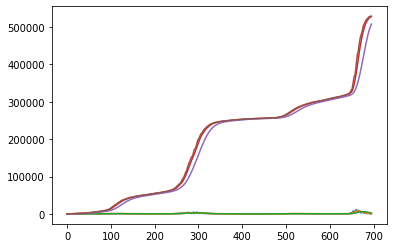

In [ ]:
t = np.linspace(0, df_new.shape[0] - 1, df_new.shape[0])
plt.plot(t, df_new)

In [ ]:
np.log(np.exp(2))
d = (1/120) * np.log(N*y1_a[120])
test_k = 1/3
test_a = test_k + d
print(test_a)
print(test_k)

0.42168169579049586
0.3333333333333333


In [ ]:
max(y2_c)

0.07886597663186161

In [ ]:
#higher a-value means higher peak but shorter pandemic
#higher k-value means lower peak but longer pandemic

a =  0.24499999999999997
k =  0.11666666666666665
R0 =  2.1
Max =  0.17044897038604553


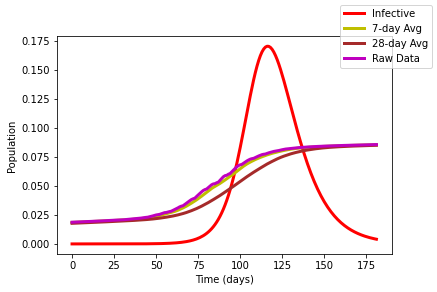

In [ ]:
def wave2(a, k):
  size2 = df_wave2.shape[0]
  t = np.linspace(0, size2-1, size2)
  x = odeint(odes,x0,t, args=(a, k))

  S = x[:,0]
  I = x[:,1]
  R = x[:,2]

  y2_a = df_wave2['Total Infected for 7-day Avg'].to_numpy().copy()
  y2_a /= N2
  y2_b = df_wave2['Total Infected for 28-day Avg'].to_numpy().copy()
  y2_b /= N2
  y2_c = df_wave2['Total Infected'].to_numpy().copy()
  y2_c.astype(float)
  y2_c /= N2
  y2 = np.array([y2_a, y2_b, y2_c])

  fig2 = plt.figure(1); fig2.clf()
  #plt.plot(t, S, 'g', lw=3, label='Suseptible')
  plt.plot(t, I, 'r', lw=3, label='Infective')
  #plt.plot(t, R, 'b', lw=3, label='Removed')
  plt.plot(t, y2[0], 'y', lw=3, label='7-day Avg')
  plt.plot(t, y2[1], 'brown', lw=3, label='28-day Avg')
  plt.plot(t, y2[2], 'm', lw=3, label='Raw Data')

  fig2.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Population')

  return S, I, R

const = 0.35
a = 0.7*const
k = 0.3333333333333333*const
S, I, R = wave2(a, k)
R0 = a/k
print("a = ", a)
print("k = ", k)
print("R0 = ", R0)
print("Max = ", max(I))

In [ ]:
d = (1/50) * np.log(N*y2_a[50])
test_k = 1/3
test_a = test_k + d
print(test_a)
print(test_k)

0.5564160950799742
0.3333333333333333


In [ ]:
fig1 = plt.figure(1); fig1.clf()
#plt.plot(t, S, 'g', lw=3, label='Suseptible')
plt.plot(t, I, 'r', lw=3, label='Infective')
#plt.plot(t, R, 'b', lw=3, label='Removed')
plt.plot(t, y1[0], 'y', lw=3, label='7-day Avg')
plt.plot(t, y1[1], 'brown', lw=3, label='28-day Avg')
plt.plot(t, y1[2], 'm', lw=3, label='Raw Data')

fig1.legend()
plt.xlabel('Time (days)')
plt.ylabel('Population')

In [ ]:
t = np.linspace(0, 10)
x = odeint(odes,x0,t, args=(6,1.4))

S = x[:,0]
I = x[:,1]
R = x[:,2]

print(max(I))
fig = plt.figure(1); fig.clf()
plt.plot(t, S, 'g', lw=3, label='Suseptible')
plt.plot(t, I, 'r', lw=3, label='Infective')
plt.plot(t, R, 'b', lw=3, label='Removed')

fig.legend()
plt.xlabel('Time (days)')
plt.ylabel('Population')

In [ ]:
print(max(I))
print(max(y1[0]))

0.4227124237226342
0.016981501079187014


In [ ]:
df_wave1